# Praproses Data Fasilitas Kesehatan - Indeks Pembangunan Manusia

## Kontributor
* Achmad Abdul Rofiq 1503631
* Yuniarti Musa’adah 1504215

## Tahapan
1. [Load Library](#load-lib)
2. [Load Data](#load-data)
3. [Analisa Atribut](#analisa-atribut)
4. [Pembuangan Atribut](#pembuangan-atribut)
5. [Persiapan Integrasi](#persiapan-integrasi)
6. [Integrasi](#integrasi)


### Load Library <a name="load-lib"></a>
load beberapa library yang digunakan

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data <a name="load-data"></a>
Load data dari folder /Data, tapi perhatikan struktur csv, isi parameter `sep` bila csv menggunakan separator selain koma (`,`)

In [2]:
# Data RS Perkelas 2010-2014
rs_df = pd.read_csv('../Data/rsumumperkelas.csv', sep=';')
rs_df.head(5)

Wilayah    Lintang       Bujur  rsKelasA2014  rsKelasB2014  \
0             Aceh    3,93002   97,833252             3             6   
1   Sumatera Utara   2,163792   98,256226             1            23   
2   Sumatera Barat  -0,944781  100,689697             1             4   
3             Riau   0,439449  101,942139             1             8   
4            Jambi  -1,589423   103,60911             0             3   

   rsKelasC2014  rsKelasD2014  rsBelumDitentukan2014  rsKelasA2013  \
0            25             8                     22             2   
1            58            28                     67             1   
2            22            16                     19             1   
3            27            14                     12             1   
4            12             6                     12             0   

   rsKelasB2013     ...       rsKelasA2011  rsKelasB2011  rsKelasC2011  \
0             5     ...                  2             5            12   
1            21     ...                  2             9            18   
2             4     ...                  0             5            13   
3             8     ...                  1             1            11   
4             2     ...                  0             2             9   

   rsKelasD2011  rsBelumDitentukan2011  rsKelasA2010  rsKelasB2010  \
0             5                      2             0             4   
1             3                      4             1             8   
2             3                      0             0             2   
3             5                      0             0             1   
4             2                      0             0             1   

   rsKelasC2010  rsKelasD2010  Unnamed: 27  
0            12             5          NaN  
1            19             3          NaN  
2            14             2          NaN  
3            10             3          NaN  
4             9             2          NaN  

[5 rows x 28 columns]

In [3]:
# Data Tenaga Medis 2010-2014
medis_df = pd.read_csv('../Data/tenagamedis.csv', sep=';')
medis_df.head(5) 

Wilayah    Lintang       Bujur  dokterSpesialis2010  \
0             Aceh    3,93002   97,833252                  242   
1   Sumatera Utara   2,163792   98,256226                  400   
2   Sumatera Barat  -0,944781  100,689697                  290   
3             Riau   0,439449  101,942139                  160   
4            Jambi  -1,589423   103,60911                  161   

   dokterUmum2010  dokterGigi2010  dokterSpesialis2011  dokterUmum2011  \
0             841             161                  340            1137   
1            1791             702                 1279            2724   
2             738             286                  470            1001   
3             779             284                  229             904   
4             433             102                  204             639   

   dokterGigi2011  dokterSpesialis2012  dokterUmum2012  dokterGigi2012  \
0             216                  563            1319             279   
1             813                 1931            2920             865   
2             377                  497            1037             377   
3             316                  733            1074             358   
4             169                  387             655             173   

   dokterSpesialis2013  dokterUmum2013  dokterGigi2013  dokterSpesialis2014  \
0                  854            1446             265                 1191   
1                 2191            3161             857                 3514   
2                  816            1230             405                  819   
3                  781            1182             359                 1163   
4                  429             719             179                  527   

   dokterUmum2014  dokterGigi2014  
0            1452             278  
1            3042             846  
2            1083             386  
3            1184             373  
4             723             182

In [4]:
# Data Index Pembangunan Manusia, Terdiri dri 2 sheet
xl = pd.ExcelFile('../Data/ipm_baru.xlsx')
xl.sheet_names  # see all sheet names

['KabKota', 'Provinsi']

In [5]:
# baca sheet provinsi
ipm_df = xl.parse('Provinsi')
ipm_df.head(5)

Kode        Kab/Kota  AHH 2010  AHH 2011  AHH 2012  AHH 2013  AHH 2014  \
0  1100            ACEH     69.08     69.15     69.23     69.31     69.35   
1  1200  SUMATERA UTARA     67.46     67.63     67.81     67.94     68.04   
2  1300  SUMATERA BARAT     67.59     67.79     68.00     68.21     68.32   
3  1400            RIAU     70.15     70.32     70.49     70.67     70.76   
4  1500           JAMBI     69.89     70.04     70.19     70.35     70.43   

    AHH 2015  AHH 2016  AHH 2017    ...     Pengeluaran 2016  \
0  69.500000     69.51     69.52    ...                 8768   
1  68.285455     68.33     68.37    ...                 9744   
2  68.656842     68.73     68.78    ...                10126   
3  70.926667     70.97     70.99    ...                10465   
4  70.560000     70.71     70.76    ...                 9795   

   Pengeluaran 2017   IPM 2010   IPM 2011   IPM 2012   IPM 2013   IPM 2014  \
0              8957  67.092016  67.447345  67.806011  68.303798  68.810074   
1             10036  67.087241  67.340712  67.737146  68.362490  68.865285   
2             10306  67.254816  67.808596  68.360792  68.913248  69.355075   
3             10677  68.653764  68.900336  69.147161  69.913243  70.334759   
4              9880  65.387623  66.143982  66.936700  67.755401  68.238473   

    IPM 2015  IPM 2016  IPM 2017  
0  69.448876     70.00     70.60  
1  69.507122     70.00     70.57  
2  69.979650     70.73     71.24  
3  70.843072     71.20     71.79  
4  68.888694     69.62     69.99  

[5 rows x 42 columns]

### Analisa Atribut <a name="analisa-atribut"></a>

In [6]:
# Atribut pada 3 dataframe
list(rs_df.columns)

['Wilayah',
 'Lintang',
 'Bujur',
 'rsKelasA2014',
 'rsKelasB2014',
 'rsKelasC2014',
 'rsKelasD2014',
 'rsBelumDitentukan2014',
 'rsKelasA2013',
 'rsKelasB2013',
 'rsKelasC2013',
 'rsKelasD2013',
 'rsBelumDitentukan2013',
 'rsKelasA2012',
 'rsKelasB2012',
 'rsKelasC2012',
 'rsKelasD2012',
 'rsBelumDitentukan2012',
 'rsKelasA2011',
 'rsKelasB2011',
 'rsKelasC2011',
 'rsKelasD2011',
 'rsBelumDitentukan2011',
 'rsKelasA2010',
 'rsKelasB2010',
 'rsKelasC2010',
 'rsKelasD2010',
 'Unnamed: 27']

In [7]:
rs_df[rs_df.columns[27]]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
Name: Unnamed: 27, dtype: float64

Atribut yang dianggap tidak relevan :
* Lintang
* Bujur
* unnamed

In [8]:
list(medis_df.columns)

['Wilayah',
 'Lintang',
 'Bujur',
 'dokterSpesialis2010',
 'dokterUmum2010',
 'dokterGigi2010',
 'dokterSpesialis2011',
 'dokterUmum2011',
 'dokterGigi2011',
 'dokterSpesialis2012',
 'dokterUmum2012',
 'dokterGigi2012',
 'dokterSpesialis2013',
 'dokterUmum2013',
 'dokterGigi2013',
 'dokterSpesialis2014',
 'dokterUmum2014',
 'dokterGigi2014']

Atribut yang dianggap tidak relevan :
* Lintang
* Bujur

### Keterangan Atribut IPM
- Angka Harapan Hidup (tahun)
- Expected Years of Schooling / Harapan Lama Sekolah (tahun)
- Mean Years of Schooling / Rata-rata Lama Sekolah (tahun)
- pengeluaran (ribu rupiah)
- Indeks Pembangunan Manusia

In [9]:
list(ipm_df.columns)

['Kode',
 'Kab/Kota',
 'AHH 2010',
 'AHH 2011',
 'AHH 2012',
 'AHH 2013',
 'AHH 2014',
 'AHH 2015',
 'AHH 2016',
 'AHH 2017',
 'EYS 2010',
 'EYS 2011',
 'EYS 2012',
 'EYS 2013',
 'EYS 2014',
 'EYS 2015',
 'EYS 2016',
 'EYS 2017',
 'MYS 2010',
 'MYS 2011',
 'MYS 2012',
 'MYS 2013',
 'MYS 2014',
 'MYS 2015',
 'MYS 2016',
 'MYS 2017',
 'Pengeluaran 2010',
 'Pengeluaran 2011',
 'Pengeluaran 2012',
 'Pengeluaran 2013',
 'Pengeluaran 2014',
 'Pengeluaran 2015',
 'Pengeluaran 2016',
 'Pengeluaran 2017',
 'IPM 2010',
 'IPM 2011',
 'IPM 2012',
 'IPM 2013',
 'IPM 2014',
 'IPM 2015',
 'IPM 2016',
 'IPM 2017']

Atribut yang dianggap tidak relevan :
* Kode
* Data pada tahun 2016-2017 (karena data lain tidak memiliki atribut di tahun yang sama)
* Data Summary "Indonesia"

### Pembuangan Atribut <a name="pembuangan-atribut"></a>

In [10]:
# rs_df
rs_df = rs_df.drop(["Lintang","Bujur",],axis=1)
rs_df = rs_df.drop(rs_df.columns[rs_df.columns.str.contains('unnamed',case = False)],axis = 1)
list(rs_df.columns)

['Wilayah',
 'rsKelasA2014',
 'rsKelasB2014',
 'rsKelasC2014',
 'rsKelasD2014',
 'rsBelumDitentukan2014',
 'rsKelasA2013',
 'rsKelasB2013',
 'rsKelasC2013',
 'rsKelasD2013',
 'rsBelumDitentukan2013',
 'rsKelasA2012',
 'rsKelasB2012',
 'rsKelasC2012',
 'rsKelasD2012',
 'rsBelumDitentukan2012',
 'rsKelasA2011',
 'rsKelasB2011',
 'rsKelasC2011',
 'rsKelasD2011',
 'rsBelumDitentukan2011',
 'rsKelasA2010',
 'rsKelasB2010',
 'rsKelasC2010',
 'rsKelasD2010']

In [11]:
# medis_df
medis_df = medis_df.drop(["Lintang","Bujur",],axis=1)
list(medis_df.columns)

['Wilayah',
 'dokterSpesialis2010',
 'dokterUmum2010',
 'dokterGigi2010',
 'dokterSpesialis2011',
 'dokterUmum2011',
 'dokterGigi2011',
 'dokterSpesialis2012',
 'dokterUmum2012',
 'dokterGigi2012',
 'dokterSpesialis2013',
 'dokterUmum2013',
 'dokterGigi2013',
 'dokterSpesialis2014',
 'dokterUmum2014',
 'dokterGigi2014']

In [12]:
# ipm_df
ipm_df = ipm_df.drop(["Kode"],axis=1)
ipm_df = ipm_df.rename({'Kab/Kota':'Provinsi'}, axis='columns')
ipm_df = ipm_df.drop(ipm_df.columns[ipm_df.columns.str.contains('2015',case = False)],axis = 1)
ipm_df = ipm_df.drop(ipm_df.columns[ipm_df.columns.str.contains('2016',case = False)],axis = 1)
ipm_df = ipm_df.drop(ipm_df.columns[ipm_df.columns.str.contains('2017',case = False)],axis = 1)
# row Indonesia, kebetulan row terakhir
ipm_df = ipm_df[:-1]
list(ipm_df.columns)

['Provinsi',
 'AHH 2010',
 'AHH 2011',
 'AHH 2012',
 'AHH 2013',
 'AHH 2014',
 'EYS 2010',
 'EYS 2011',
 'EYS 2012',
 'EYS 2013',
 'EYS 2014',
 'MYS 2010',
 'MYS 2011',
 'MYS 2012',
 'MYS 2013',
 'MYS 2014',
 'Pengeluaran 2010',
 'Pengeluaran 2011',
 'Pengeluaran 2012',
 'Pengeluaran 2013',
 'Pengeluaran 2014',
 'IPM 2010',
 'IPM 2011',
 'IPM 2012',
 'IPM 2013',
 'IPM 2014']

### Persiapan Integrasi <a name="persiapan-integrasi"></a>
Data akan di integrasi berdasarkan Nama Provinsi, Pertama tama di cek dulu apakah nama provinsi sudah konsisten di 3 data atau belum.

In [13]:
# Gabung Dahulu Provinsi
provinsi = {'ipm':ipm_df.iloc[:,0],'rs':rs_df.iloc[:,0],'medis':medis_df.iloc[:,0]}
provinsi_df = pd.DataFrame(data=provinsi)
#ubah semua value menjadi lowercase
provinsi_df = provinsi_df.apply(lambda x: x.astype(str).str.lower())
provinsi_df

ipm                          rs                  medis
0                   aceh                        aceh                   aceh
1         sumatera utara              sumatera utara         sumatera utara
2         sumatera barat              sumatera barat         sumatera barat
3                   riau                        riau                   riau
4                  jambi                       jambi                  jambi
5       sumatera selatan            sumatera selatan       sumatera selatan
6               bengkulu                    bengkulu               bengkulu
7                lampung                     lampung                lampung
8   kep. bangka belitung   kepulauan bangka belitung   kep. bangka belitung
9         kepulauan riau              kepulauan riau         kepulauan riau
10           dki jakarta                 dki jakarta            dki jakarta
11            jawa barat                  jawa barat             jawa barat
12           jawa tengah                 jawa tengah            jawa tengah
13        d i yogyakarta               di yogyakarta          di yogyakarta
14            jawa timur                  jawa timur             jawa timur
15                banten                      banten                 banten
16                  bali                        bali                   bali
17   nusa tenggara barat         nusa tenggara barat    nusa tenggara barat
18   nusa tenggara timur         nusa tenggara timur    nusa tenggara timur
19      kalimantan barat            kalimantan barat       kalimantan barat
20     kalimantan tengah           kalimantan tengah      kalimantan tengah
21    kalimantan selatan          kalimantan selatan     kalimantan selatan
22      kalimantan timur            kalimantan timur       kalimantan timur
23      kalimantan utara            kalimantan utara       kalimantan utara
24        sulawesi utara              sulawesi utara         sulawesi utara
25       sulawesi tengah             sulawesi tengah        sulawesi tengah
26      sulawesi selatan            sulawesi selatan       sulawesi selatan
27     sulawesi tenggara           sulawesi tenggara      sulawesi tenggara
28             gorontalo                   gorontalo              gorontalo
29        sulawesi barat              sulawesi barat         sulawesi barat
30                maluku                      maluku                 maluku
31          maluku utara                maluku utara           maluku utara
32           papua barat                 papua barat            papua barat
33                 papua                       papua                  papua

In [14]:
# perlu di trim dahulu, 
# karena datanya mungkin mengandung whitespace yang tidak sengaja diketik sehingga query jadi tidak akurat
provinsi_df[provinsi_df.columns] = provinsi_df.apply(lambda x: x.str.strip())
# tujukkan data yang berbeda
provinsi_df.query('ipm != rs | rs != medis | ipm != medis')

ipm                         rs                 medis
8   kep. bangka belitung  kepulauan bangka belitung  kep. bangka belitung
13        d i yogyakarta              di yogyakarta         di yogyakarta

ternyata ada 2 data nama yang tidak konsisten.

In [15]:
provinsi_df['rs'][8] = 'kep. bangka belitung'
provinsi_df['ipm'][13] = 'di yogyakarta'
provinsi_df.query('ipm != rs | rs != medis | ipm != medis')

Empty DataFrame
Columns: [ipm, rs, medis]
Index: []

Nama Provinsi sudah sama semua, kamudian nama-nama ini di copy ke masing-masing data asalnya

In [16]:
ipm_df.iloc[:,0] = provinsi_df['ipm']
medis_df.iloc[:,0] = provinsi_df['medis']
rs_df.iloc[:,0] = provinsi_df['rs']

In [17]:
ipm_df.head(5)

Provinsi  AHH 2010  AHH 2011  AHH 2012  AHH 2013  AHH 2014  \
0            aceh     69.08     69.15     69.23     69.31     69.35   
1  sumatera utara     67.46     67.63     67.81     67.94     68.04   
2  sumatera barat     67.59     67.79     68.00     68.21     68.32   
3            riau     70.15     70.32     70.49     70.67     70.76   
4           jambi     69.89     70.04     70.19     70.35     70.43   

    EYS 2010   EYS 2011   EYS 2012   EYS 2013    ...      Pengeluaran 2010  \
0  12.898992  13.030751  13.190554  13.357535    ...           7933.730840   
1  11.821153  11.828017  11.972313  12.405514    ...           9195.672029   
2  12.224745  12.518194  12.807945  13.155905    ...           9339.121293   
3  11.762097  11.775413  11.788730  12.272723    ...           9857.358650   
4  11.341681  11.602950  11.725549  12.173987    ...           8478.450789   

   Pengeluaran 2011  Pengeluaran 2012  Pengeluaran 2013  Pengeluaran 2014  \
0       8043.674576       8134.009402       8288.786991       8297.477459   
1       9230.748821       9265.825613       9308.761326       9391.000035   
2       9408.740987       9478.879671       9569.541212       9620.729510   
3       9957.094563      10057.839597      10179.603960      10262.397966   
4       8664.045634       8943.548788       9066.269640       9141.150844   

    IPM 2010   IPM 2011   IPM 2012   IPM 2013   IPM 2014  
0  67.092016  67.447345  67.806011  68.303798  68.810074  
1  67.087241  67.340712  67.737146  68.362490  68.865285  
2  67.254816  67.808596  68.360792  68.913248  69.355075  
3  68.653764  68.900336  69.147161  69.913243  70.334759  
4  65.387623  66.143982  66.936700  67.755401  68.238473  

[5 rows x 26 columns]

In [18]:
rs_df.head(5)

Wilayah  rsKelasA2014  rsKelasB2014  rsKelasC2014  rsKelasD2014  \
0            aceh             3             6            25             8   
1  sumatera utara             1            23            58            28   
2  sumatera barat             1             4            22            16   
3            riau             1             8            27            14   
4           jambi             0             3            12             6   

   rsBelumDitentukan2014  rsKelasA2013  rsKelasB2013  rsKelasC2013  \
0                     22             2             5            24   
1                     67             1            21            53   
2                     19             1             4            22   
3                     12             1             8            22   
4                     12             0             2            10   

   rsKelasD2013      ...       rsBelumDitentukan2012  rsKelasA2011  \
0            10      ...                          19             2   
1            24      ...                         100             2   
2            15      ...                          19             0   
3            12      ...                          15             1   
4             6      ...                           6             0   

   rsKelasB2011  rsKelasC2011  rsKelasD2011  rsBelumDitentukan2011  \
0             5            12             5                      2   
1             9            18             3                      4   
2             5            13             3                      0   
3             1            11             5                      0   
4             2             9             2                      0   

   rsKelasA2010  rsKelasB2010  rsKelasC2010  rsKelasD2010  
0             0             4            12             5  
1             1             8            19             3  
2             0             2            14             2  
3             0             1            10             3  
4             0             1             9             2  

[5 rows x 25 columns]

In [19]:
medis_df.head(5)

Wilayah  dokterSpesialis2010  dokterUmum2010  dokterGigi2010  \
0            aceh                  242             841             161   
1  sumatera utara                  400            1791             702   
2  sumatera barat                  290             738             286   
3            riau                  160             779             284   
4           jambi                  161             433             102   

   dokterSpesialis2011  dokterUmum2011  dokterGigi2011  dokterSpesialis2012  \
0                  340            1137             216                  563   
1                 1279            2724             813                 1931   
2                  470            1001             377                  497   
3                  229             904             316                  733   
4                  204             639             169                  387   

   dokterUmum2012  dokterGigi2012  dokterSpesialis2013  dokterUmum2013  \
0            1319             279                  854            1446   
1            2920             865                 2191            3161   
2            1037             377                  816            1230   
3            1074             358                  781            1182   
4             655             173                  429             719   

   dokterGigi2013  dokterSpesialis2014  dokterUmum2014  dokterGigi2014  
0             265                 1191            1452             278  
1             857                 3514            3042             846  
2             405                  819            1083             386  
3             359                 1163            1184             373  
4             179                  527             723             182

### Pengisian Data Kosong <a name="pengisian-data-kosong"></a>

In [20]:
#cek data kosong pada dataset tenaga medis
medis_df.isnull().sum()

Wilayah                0
dokterSpesialis2010    0
dokterUmum2010         0
dokterGigi2010         0
dokterSpesialis2011    0
dokterUmum2011         0
dokterGigi2011         0
dokterSpesialis2012    0
dokterUmum2012         0
dokterGigi2012         0
dokterSpesialis2013    0
dokterUmum2013         0
dokterGigi2013         0
dokterSpesialis2014    0
dokterUmum2014         0
dokterGigi2014         0
dtype: int64

In [21]:
#cek data kosong pada dataset rumahsakit
rs_df.isnull().sum()

Wilayah                  0
rsKelasA2014             0
rsKelasB2014             0
rsKelasC2014             0
rsKelasD2014             0
rsBelumDitentukan2014    0
rsKelasA2013             0
rsKelasB2013             0
rsKelasC2013             0
rsKelasD2013             0
rsBelumDitentukan2013    0
rsKelasA2012             0
rsKelasB2012             0
rsKelasC2012             0
rsKelasD2012             0
rsBelumDitentukan2012    0
rsKelasA2011             0
rsKelasB2011             0
rsKelasC2011             0
rsKelasD2011             0
rsBelumDitentukan2011    0
rsKelasA2010             0
rsKelasB2010             0
rsKelasC2010             0
rsKelasD2010             0
dtype: int64

In [22]:
#cek data kosong pada dataset ipm
ipm_df.isnull().sum()

Provinsi            0
AHH 2010            0
AHH 2011            0
AHH 2012            0
AHH 2013            0
AHH 2014            0
EYS 2010            1
EYS 2011            1
EYS 2012            1
EYS 2013            0
EYS 2014            0
MYS 2010            1
MYS 2011            1
MYS 2012            1
MYS 2013            0
MYS 2014            0
Pengeluaran 2010    1
Pengeluaran 2011    1
Pengeluaran 2012    1
Pengeluaran 2013    0
Pengeluaran 2014    0
IPM 2010            1
IPM 2011            1
IPM 2012            1
IPM 2013            0
IPM 2014            0
dtype: int64


Data yang kosong diisi dengan nilai rata-ratanya

In [23]:
#isi data kosong EYS
ipm_df['EYS 2010'].fillna(ipm_df['EYS 2010'].mean(),inplace=True)
ipm_df['EYS 2011'].fillna(ipm_df['EYS 2011'].mean(),inplace=True)
ipm_df['EYS 2012'].fillna(ipm_df['EYS 2012'].mean(),inplace=True)
#isi data kosong MYS
ipm_df['MYS 2010'].fillna(ipm_df['MYS 2010'].mean(),inplace=True)
ipm_df['MYS 2011'].fillna(ipm_df['MYS 2011'].mean(),inplace=True)
ipm_df['MYS 2012'].fillna(ipm_df['MYS 2012'].mean(),inplace=True)
#isi data kosong Pengeluaran
ipm_df['Pengeluaran 2010'].fillna(ipm_df['Pengeluaran 2010'].mean(),inplace=True)
ipm_df['Pengeluaran 2011'].fillna(ipm_df['Pengeluaran 2011'].mean(),inplace=True)
ipm_df['Pengeluaran 2012'].fillna(ipm_df['Pengeluaran 2012'].mean(),inplace=True)
#isi data kosong IPM
ipm_df['IPM 2010'].fillna(ipm_df['IPM 2010'].mean(),inplace=True)
ipm_df['IPM 2011'].fillna(ipm_df['IPM 2011'].mean(),inplace=True)
ipm_df['IPM 2012'].fillna(ipm_df['IPM 2012'].mean(),inplace=True)

In [24]:
#cek kembali data kosong
ipm_df.isnull().sum()

Provinsi            0
AHH 2010            0
AHH 2011            0
AHH 2012            0
AHH 2013            0
AHH 2014            0
EYS 2010            0
EYS 2011            0
EYS 2012            0
EYS 2013            0
EYS 2014            0
MYS 2010            0
MYS 2011            0
MYS 2012            0
MYS 2013            0
MYS 2014            0
Pengeluaran 2010    0
Pengeluaran 2011    0
Pengeluaran 2012    0
Pengeluaran 2013    0
Pengeluaran 2014    0
IPM 2010            0
IPM 2011            0
IPM 2012            0
IPM 2013            0
IPM 2014            0
dtype: int64

### Pemisahan nama atribut dan waktu <a name="pemisahan-nama-atribut-dan-waktu"></a>

In [25]:
#membuat data frame baru dari dataset tenaga medis
#memisahkan antara atribut dan waktu
df_medis_baru = pd.DataFrame(columns=['Wilayah','DokterSpesialis','DokterUmum','DokterGigi','Tahun'])
listWilayah = medis_df['Wilayah'].tolist()
listDS = ['dokterSpesialis2010','dokterSpesialis2011','dokterSpesialis2012','dokterSpesialis2013','dokterSpesialis2014']
listDU = ['dokterUmum2010','dokterUmum2011','dokterUmum2012','dokterUmum2013','dokterUmum2014']
listDG = ['dokterGigi2010','dokterGigi2011','dokterGigi2012','dokterGigi2013','dokterGigi2014']
tahun = [2010, 2011,2012,2013,2014]

for j in range(0,5):
    ds = medis_df[listDS[j]].tolist()
    du = medis_df[listDU[j]].tolist()
    dg = medis_df[listDG[j]].tolist()
    for i in range(0, len(medis_df)):
        df_medis_baru = df_medis_baru.append({'Wilayah':listWilayah[i],'DokterSpesialis':ds[i],'DokterUmum':du[i],'DokterGigi':dg[i],'Tahun':tahun[j]}, ignore_index=True)
        

In [26]:
df_medis_baru.head(50)

Wilayah DokterSpesialis DokterUmum DokterGigi Tahun
0                   aceh             242        841        161  2010
1         sumatera utara             400       1791        702  2010
2         sumatera barat             290        738        286  2010
3                   riau             160        779        284  2010
4                  jambi             161        433        102  2010
5       sumatera selatan              60        505         93  2010
6               bengkulu              49        377         83  2010
7                lampung             130        596        171  2010
8   kep. bangka belitung              16        189         46  2010
9         kepulauan riau              61        339         97  2010
10           dki jakarta            2605       3302       1187  2010
11            jawa barat             902       2385       1033  2010
12           jawa tengah            1053       2716        859  2010
13         di yogyakarta              47        378        199  2010
14            jawa timur             693       2377       1124  2010
15                banten             102        537        235  2010
16                  bali             343        937        312  2010
17   nusa tenggara barat              69        381        100  2010
18   nusa tenggara timur              25        444        131  2010
19      kalimantan barat             102        468        127  2010
20     kalimantan tengah              34        385         83  2010
21    kalimantan selatan             134        539        151  2010
22      kalimantan timur             206        729        254  2010
23      kalimantan utara               0          0          0  2010
24        sulawesi utara              44        516         45  2010
25       sulawesi tengah              88        363         92  2010
26      sulawesi selatan              64        471        322  2010
27     sulawesi tenggara              57        354         88  2010
28             gorontalo              39        191         24  2010
29        sulawesi barat              16        168         71  2010
30                maluku              36        271         73  2010
31          maluku utara              37        199         60  2010
32           papua barat              61        165         37  2010
33                 papua              77        469         99  2010
34                  aceh             340       1137        216  2011
35        sumatera utara            1279       2724        813  2011
36        sumatera barat             470       1001        377  2011
37                  riau             229        904        316  2011
38                 jambi             204        639        169  2011
39      sumatera selatan             189        767        124  2011
40              bengkulu             148        374         88  2011
41               lampung             263        881        249  2011
42  kep. bangka belitung              12        226         55  2011
43        kepulauan riau             104        459        128  2011
44           dki jakarta            4232       2484       1067  2011
45            jawa barat            1477       2860       1112  2011
46           jawa tengah            2489       4186       1154  2011
47         di yogyakarta             843       1252        448  2011
48            jawa timur             651       2822       1253  2011
49                banten             727        679        218  2011

In [27]:
#Karena pada dataset atribut 'rsBelumDitentukan2010' tidak ada maka ditambahkan terlebih dahulu
rs_df['rsBelumDitentukan2010'] = 0
rs_df.head(10)

Wilayah  rsKelasA2014  rsKelasB2014  rsKelasC2014  \
0                  aceh             3             6            25   
1        sumatera utara             1            23            58   
2        sumatera barat             1             4            22   
3                  riau             1             8            27   
4                 jambi             0             3            12   
5      sumatera selatan             3             5            24   
6              bengkulu             0             2             4   
7               lampung             0             4            25   
8  kep. bangka belitung             0             1             6   
9        kepulauan riau             0             5            11   

   rsKelasD2014  rsBelumDitentukan2014  rsKelasA2013  rsKelasB2013  \
0             8                     22             2             5   
1            28                     67             1            21   
2            16                     19             1             4   
3            14                     12             1             8   
4             6                     12             0             2   
5            11                     12             3             5   
6            10                      3             0             2   
7             7                     17             0             4   
8             6                      3             0             1   
9             5                      4             0             4   

   rsKelasC2013  rsKelasD2013          ...            rsKelasA2011  \
0            24            10          ...                       2   
1            53            24          ...                       2   
2            22            15          ...                       0   
3            22            12          ...                       1   
4            10             6          ...                       0   
5            18            11          ...                       3   
6             4            10          ...                       0   
7            24             7          ...                       0   
8             5             7          ...                       0   
9             9             5          ...                       0   

   rsKelasB2011  rsKelasC2011  rsKelasD2011  rsBelumDitentukan2011  \
0             5            12             5                      2   
1             9            18             3                      4   
2             5            13             3                      0   
3             1            11             5                      0   
4             2             9             2                      0   
5             3             8             9                      1   
6             2             3             7                      0   
7             3             8             2                      0   
8             1             4             3                      0   
9             0             7             1                      0   

   rsKelasA2010  rsKelasB2010  rsKelasC2010  rsKelasD2010  \
0             0             4            12             5   
1             1             8            19             3   
2             0             2            14             2   
3             0             1            10             3   
4             0             1             9             2   
5             1             1             9             7   
6             0             1             3             7   
7             0             2             7             2   
8             0             0             3             4   
9             0             0             7             1   

   rsBelumDitentukan2010  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
5                      0  
6                      0  
7                      0  
8                      0  
9

In [28]:
#membuat data frame baru dari dataset kelas rumah sakit
#memisahkan antara atribut dan waktu
df_rs_baru = pd.DataFrame(columns=['Wilayah','rsKelasA','rsKelasB','rsKelasC','rsKelasD','rsBelumDitentukan','Tahun'])
listWilayah = rs_df['Wilayah'].tolist()
listRSA = ['rsKelasA2010','rsKelasA2011','rsKelasA2012','rsKelasA2013','rsKelasA2014',]
listRSB = ['rsKelasB2010','rsKelasB2011','rsKelasB2012','rsKelasB2013','rsKelasB2014',]
listRSC = ['rsKelasC2010','rsKelasC2011','rsKelasC2012','rsKelasC2013','rsKelasC2014',]
listRSD = ['rsKelasD2010','rsKelasD2011','rsKelasD2012','rsKelasD2013','rsKelasD2014',]
listBDT = ['rsBelumDitentukan2010','rsBelumDitentukan2011','rsBelumDitentukan2012','rsBelumDitentukan2013','rsBelumDitentukan2014']
tahun = [2010,2011,2012,2013,2014]

for j in range(0,5):
    rsa = rs_df[listRSA[j]].tolist()
    rsb = rs_df[listRSB[j]].tolist()
    rsc = rs_df[listRSC[j]].tolist()
    rsd = rs_df[listRSD[j]].tolist()
    bdt = rs_df[listBDT[j]].tolist()
    for i in range(0, len(rs_df)):
        df_rs_baru = df_rs_baru.append({'Wilayah':listWilayah[i],'rsKelasA':rsa[i],'rsKelasB':rsb[i],'rsKelasC':rsc[i],'rsKelasD':rsd[i],'rsBelumDitentukan':bdt[i],'Tahun':tahun[j]}, ignore_index=True)

In [29]:
df_rs_baru.head(50)

Wilayah rsKelasA rsKelasB rsKelasC rsKelasD  \
0                   aceh        0        4       12        5   
1         sumatera utara        1        8       19        3   
2         sumatera barat        0        2       14        2   
3                   riau        0        1       10        3   
4                  jambi        0        1        9        2   
5       sumatera selatan        1        1        9        7   
6               bengkulu        0        1        3        7   
7                lampung        0        2        7        2   
8   kep. bangka belitung        0        0        3        4   
9         kepulauan riau        0        0        7        1   
10           dki jakarta        2        6        1        0   
11            jawa barat        1       18       13        2   
12           jawa tengah        1       20       20        6   
13         di yogyakarta        1        3        1        0   
14            jawa timur        1       19       23        7   
15                banten        0        4        2        0   
16                  bali        1        4        4        1   
17   nusa tenggara barat        0        1        6        1   
18   nusa tenggara timur        0        1        5       11   
19      kalimantan barat        0        2        7        4   
20     kalimantan tengah        0        2        5        7   
21    kalimantan selatan        0        2       10        2   
22      kalimantan timur        0        5        8        3   
23      kalimantan utara        0        0        0        0   
24        sulawesi utara        0        1        4        7   
25       sulawesi tengah        0        2        7        3   
26      sulawesi selatan        1        5       18        2   
27     sulawesi tenggara        0        1        6        5   
28             gorontalo        0        1        1        4   
29        sulawesi barat        0        0        2        2   
30                maluku        0        1        2        8   
31          maluku utara        0        1        3        7   
32           papua barat        0        0        4        1   
33                 papua        0        1        5        7   
34                  aceh        2        5       12        5   
35        sumatera utara        2        9       18        3   
36        sumatera barat        0        5       13        3   
37                  riau        1        1       11        5   
38                 jambi        0        2        9        2   
39      sumatera selatan        3        3        8        9   
40              bengkulu        0        2        3        7   
41               lampung        0        3        8        2   
42  kep. bangka belitung        0        1        4        3   
43        kepulauan riau        0        0        7        1   
44           dki jakarta        6        9        0        0   
45            jawa barat        6       19       15        4   
46           jawa tengah        6       21       22        7   
47         di yogyakarta        2        4        1        1   
48            jawa timur        4       25       22        5   
49                banten        1        4        4        0   

   rsBelumDitentukan Tahun  
0                  0  2010  
1                  0  2010  
2                  0  2010  
3                  0  2010  
4                  0  2010  
5                  0  2010  
6                  0  2010  
7                  0  2010  
8                  0  2010  
9                  0  2010  
10                 0  2010  
11                 0  2010  
12                 0  2010  
13                 0  2010  
14                 0  2010  
15                 0  2010  
16                 0  2010  
17                 0  2010  
18                 0  2010  
19                 0  2010  
20                 0  2010  
21                 0  2010  
22                 0  2010  
23                 0  2010  
24                 0  2010 

In [30]:
#membuat data frame baru dari dataset ipm
#memisahkan antara atribut dan waktu
df_ipm_baru = pd.DataFrame(columns=['Provinsi','AHH','EYS','MYS','Pengeluaran','IPM','Tahun'])
listProvinsi = ipm_df['Provinsi'].tolist()
listAHH = ['AHH 2010','AHH 2011','AHH 2012','AHH 2013','AHH 2014']
listEYS = ['EYS 2010','EYS 2011','EYS 2012','EYS 2013','EYS 2014']
listMYS = ['MYS 2010','MYS 2011','MYS 2012','MYS 2013','MYS 2014']
listPengeluaran = ['Pengeluaran 2010','Pengeluaran 2011','Pengeluaran 2012','Pengeluaran 2013','Pengeluaran 2014']
listIPM = ['IPM 2010','IPM 2011','IPM 2012','IPM 2013','IPM 2014']
tahun = [2010,2011,2012,2013,2014]

for j in range(0,5):
    ahh = ipm_df[listAHH[j]].tolist()
    eys = ipm_df[listEYS[j]].tolist()
    mys = ipm_df[listMYS[j]].tolist()
    pengeluaran = ipm_df[listPengeluaran[j]].tolist()
    ipm = ipm_df[listIPM[j]].tolist()
    for i in range(0, len(ipm_df)):
        df_ipm_baru = df_ipm_baru.append({'Provinsi':listProvinsi[i],'AHH':ahh[i],'EYS':eys[i],'MYS':mys[i],'Pengeluaran':pengeluaran[i],'IPM':ipm[i],'Tahun':tahun[j]}, ignore_index=True)

In [31]:
df_ipm_baru.head(50)

Provinsi        AHH        EYS        MYS   Pengeluaran  \
0                   aceh  69.080000  12.898992   8.277721   7933.730840   
1         sumatera utara  67.460000  11.821153   8.508035   9195.672029   
2         sumatera barat  67.590000  12.224745   8.130873   9339.121293   
3                   riau  70.150000  11.762097   8.250962   9857.358650   
4                  jambi  69.890000  11.341681   7.335811   8478.450789   
5       sumatera selatan  68.340000  11.028399   7.337218   8536.195445   
6               bengkulu  67.820000  11.591000   7.845970   8458.708077   
7                lampung  68.910000  10.879447   7.256280   7963.760373   
8   kep. bangka belitung  69.150000  10.480218   7.072526  10706.791455   
9         kepulauan riau  68.420000  11.514348   9.383144  12266.615858   
10           dki jakarta  71.710000  11.856391  10.373565  15110.768356   
11            jawa barat  71.290000  10.687340   7.395239   9173.800312   
12           jawa tengah  72.730000  11.093229   6.710731   8991.958772   
13         di yogyakarta  74.170000  14.145596   8.512158  12080.211582   
14            jawa timur  69.890000  11.494528   6.729815   9002.024734   
15                banten  68.500000  11.018476   7.922949  10776.828842   
16                  bali  70.610000  11.706092   7.735728  12073.509035   
17   nusa tenggara barat  63.820000  11.659938   5.733759   8707.040699   
18   nusa tenggara timur  65.280000  10.849989   6.500760   6615.066298   
19      kalimantan barat  69.060000  10.787286   6.271588   7654.497360   
20     kalimantan tengah  68.980000  11.085614   7.617246   9257.459210   
21    kalimantan selatan  66.650000  10.862106   7.254215  10304.141329   
22      kalimantan timur  72.890000  11.866944   8.559686  10789.841206   
23      kalimantan utara  71.389963  11.409574   7.584343   9120.136709   
24        sulawesi utara  70.400000  11.335700   8.659089   8934.981611   
25       sulawesi tengah  66.070000  11.173358   7.651457   7987.732197   
26      sulawesi selatan  68.930000  11.470746   7.288989   9330.619265   
27     sulawesi tenggara  69.650000  12.151303   7.568946   8125.891189   
28             gorontalo  66.410000  11.118794   6.852436   8206.691425   
29        sulawesi barat  62.500000  10.579606   6.627194   8003.091823   
30                maluku  64.460000  12.619831   8.641788   7361.805014   
31          maluku utara  66.700000  11.742307   7.911012   6812.830967   
32           papua barat  64.590000  11.097217   6.774417   6676.790819   
33                 papua  64.310000   8.571458   5.592018   6250.524527   
34                  aceh  69.150000  13.030751   8.316424   8043.674576   
35        sumatera utara  67.630000  11.828017   8.613124   9230.748821   
36        sumatera barat  67.790000  12.518194   8.201848   9408.740987   
37                  riau  70.320000  11.775413   8.293508   9957.094563   
38                 jambi  70.040000  11.602950   7.480970   8664.045634   
39      sumatera selatan  68.510000  11.213593   7.416197   8803.251114   
40              bengkulu  67.980000  11.875958   7.929978   8571.973730   
41               lampung  69.120000  11.038288   7.276226   8118.293506   
42  kep. bangka belitung  69.310000  10.695681   7.187332  10807.988209   
43        kepulauan riau  68.630000  11.607145   9.456729  12512.966492   
44           dki jakarta  71.870000  11.905974  10.399034  15943.432591   
45            jawa barat  71.560000  10.905097   7.456786   9249.015730   
46           jawa tengah  72.910000  11.181812   6.740234   9296.374892   
47         di yogyakarta  74.260000  14.609287   8.528838  12114.524749   
48            jawa timur  70.020000  11.617179   6.787859   9396.204326   
49                banten  68.680000  11.413043   7.947639  10932.838911   

          IPM Tahun  
0   67.092016  2010  
1   67.087241  2010  
2   67.254816  2010  
3   68.653764  2010  
4   65.387623  2010  
5   64.436282  2010  
6   65.352875  2010  
7   63.714686 

### Integrasi <a name="integrasi"></a>
Data Digabung Berdasarkan nama provinsi dan tahun

In [32]:
#rename nama atribut dalam dataset tenaga medis
# nama atribut 'Wilayah' menjadi 'Provinsi'
df_medis_baru.rename(columns={'Wilayah':'Provinsi'}, inplace=True)
df_medis_baru.head()

Provinsi DokterSpesialis DokterUmum DokterGigi Tahun
0            aceh             242        841        161  2010
1  sumatera utara             400       1791        702  2010
2  sumatera barat             290        738        286  2010
3            riau             160        779        284  2010
4           jambi             161        433        102  2010

In [33]:
#rename nama atribut dalam dataset rumah sakit
# nama atribut 'Wilayah' menjadi 'Provinsi'
df_rs_baru.rename(columns={'Wilayah':'Provinsi'}, inplace=True)
df_rs_baru.head()

Provinsi rsKelasA rsKelasB rsKelasC rsKelasD rsBelumDitentukan Tahun
0            aceh        0        4       12        5                 0  2010
1  sumatera utara        1        8       19        3                 0  2010
2  sumatera barat        0        2       14        2                 0  2010
3            riau        0        1       10        3                 0  2010
4           jambi        0        1        9        2                 0  2010


Menggabung DataFrame Rumah Sakit dengan DataFrame Tenaga Medis

In [34]:

final1 = pd.merge(left=df_rs_baru, right=df_medis_baru, on=['Provinsi','Tahun'])
final1.head()

Provinsi rsKelasA rsKelasB rsKelasC rsKelasD rsBelumDitentukan Tahun  \
0            aceh        0        4       12        5                 0  2010   
1  sumatera utara        1        8       19        3                 0  2010   
2  sumatera barat        0        2       14        2                 0  2010   
3            riau        0        1       10        3                 0  2010   
4           jambi        0        1        9        2                 0  2010   

  DokterSpesialis DokterUmum DokterGigi  
0             242        841        161  
1             400       1791        702  
2             290        738        286  
3             160        779        284  
4             161        433        102

Menggabung DataFrame Final1 (Rumah Sakit dan Tenaga Medis) 
dengan DataFrame IPM

In [35]:
final = pd.merge(left=final1, right=df_ipm_baru, on=['Provinsi','Tahun'])
final

Provinsi rsKelasA rsKelasB rsKelasC rsKelasD  \
0                    aceh        0        4       12        5   
1          sumatera utara        1        8       19        3   
2          sumatera barat        0        2       14        2   
3                    riau        0        1       10        3   
4                   jambi        0        1        9        2   
5        sumatera selatan        1        1        9        7   
6                bengkulu        0        1        3        7   
7                 lampung        0        2        7        2   
8    kep. bangka belitung        0        0        3        4   
9          kepulauan riau        0        0        7        1   
10            dki jakarta        2        6        1        0   
11             jawa barat        1       18       13        2   
12            jawa tengah        1       20       20        6   
13          di yogyakarta        1        3        1        0   
14             jawa timur        1       19       23        7   
15                 banten        0        4        2        0   
16                   bali        1        4        4        1   
17    nusa tenggara barat        0        1        6        1   
18    nusa tenggara timur        0        1        5       11   
19       kalimantan barat        0        2        7        4   
20      kalimantan tengah        0        2        5        7   
21     kalimantan selatan        0        2       10        2   
22       kalimantan timur        0        5        8        3   
23       kalimantan utara        0        0        0        0   
24         sulawesi utara        0        1        4        7   
25        sulawesi tengah        0        2        7        3   
26       sulawesi selatan        1        5       18        2   
27      sulawesi tenggara        0        1        6        5   
28              gorontalo        0        1        1        4   
29         sulawesi barat        0        0        2        2   
..                    ...      ...      ...      ...      ...   
140                 jambi        0        3       12        6   
141      sumatera selatan        3        5       24       11   
142              bengkulu        0        2        4       10   
143               lampung        0        4       25        7   
144  kep. bangka belitung        0        1        6        6   
145        kepulauan riau        0        5       11        5   
146           dki jakarta       13       43       40       12   
147            jawa barat        7       47      111       52   
148           jawa tengah        8       31      110       95   
149         di yogyakarta        3       11       11       28   
150            jawa timur        6       42      107       69   
151                banten        2       16       27        7   
152                  bali        3        7       17       12   
153   nusa tenggara barat        0        3        8       11   
154   nusa tenggara timur        0        1       12       22   
155      kalimantan barat        1        3       14        9   
156     kalimantan tengah        0        2        7        6   
157    kalimantan selatan        2        2       17        4   
158      kalimantan timur        2        6       14       18   
159      kalimantan utara        0        1        3        3   
160        sulawesi utara        1        2       16       10   
161       sulawesi tengah        0        3        9        4   
162      sulawesi selatan        3       18       33        9   
163     sulawesi tenggara        0        2        7        8   
164             gorontalo        0        2        3        4   
165        sulawesi barat        0        0        2        1   
166                maluku        0        2        5       15   
167          maluku utara        0        1        3        9   
168           papua barat        0        0        4        7   
169                 papua        0        2        9

### Visualisasi Dataset

In [36]:
#cek tipe data
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 15 columns):
Provinsi             170 non-null object
rsKelasA             170 non-null object
rsKelasB             170 non-null object
rsKelasC             170 non-null object
rsKelasD             170 non-null object
rsBelumDitentukan    170 non-null object
Tahun                170 non-null object
DokterSpesialis      170 non-null object
DokterUmum           170 non-null object
DokterGigi           170 non-null object
AHH                  170 non-null float64
EYS                  170 non-null float64
MYS                  170 non-null float64
Pengeluaran          170 non-null float64
IPM                  170 non-null float64
dtypes: float64(5), object(10)
memory usage: 21.2+ KB


In [37]:
#merubah tipe data objek menjadi kategori dan numeric
#ubah tipe datanya jadi kategori
final["Provinsi"] = final["Provinsi"].astype("category")
final["Tahun"] = final["Tahun"].astype("category")

#ubah tipe datanya jadi float64
rsKelas = ['rsKelasA','rsKelasB','rsKelasC','rsKelasD','rsBelumDitentukan', 'DokterSpesialis','DokterUmum','DokterGigi']
for i in range(0, len(rsKelas)):
    final[rsKelas[i]] = final[rsKelas[i]].astype("float64")
    
final.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 15 columns):
Provinsi             170 non-null category
rsKelasA             170 non-null float64
rsKelasB             170 non-null float64
rsKelasC             170 non-null float64
rsKelasD             170 non-null float64
rsBelumDitentukan    170 non-null float64
Tahun                170 non-null category
DokterSpesialis      170 non-null float64
DokterUmum           170 non-null float64
DokterGigi           170 non-null float64
AHH                  170 non-null float64
EYS                  170 non-null float64
MYS                  170 non-null float64
Pengeluaran          170 non-null float64
IPM                  170 non-null float64
dtypes: category(2), float64(13)
memory usage: 20.6 KB


Text(0.5, 1.0, 'Grafik Kelas Rumah Sakit di Jawa Barat')

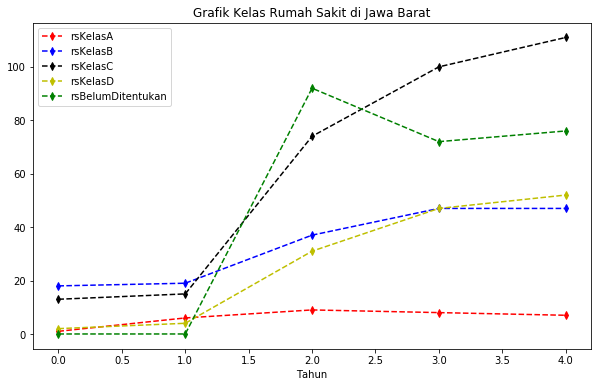

In [38]:
#menampilkan kelas rumah sakit di jawa barat dari tahun 2010 - 2014
data = final.loc[(final['Provinsi']=='jawa barat')]
x = data['Tahun'].cat.codes
y = data['rsKelasA']
z = data['rsKelasB']
a = data['rsKelasC']
b = data['rsKelasD']
c = data['rsBelumDitentukan']

#ukuran plot
plt.figure(figsize=(10,6))

#penamaan label sumbu x
plt.xlabel('Tahun')

#penggambaran grafik per kelas
g1, = plt.plot(x,y,'r--d', markersize=5)
g2, = plt.plot(x,z,'b--d', markersize=5)
g3, = plt.plot(x,a,'k--d', markersize=5)
g4, = plt.plot(x,b,'y--d', markersize=5)
g5, = plt.plot(x,c,'g--d', markersize=5)

#penulisan legend
plt.legend(['rsKelasA','rsKelasB','rsKelasC','rsKelasD','rsBelumDitentukan'])

#penulisan judul
plt.title('Grafik Kelas Rumah Sakit di Jawa Barat')

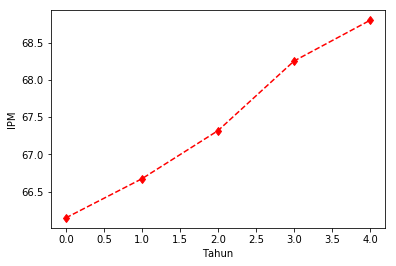

In [39]:
#menampilkan nilai ipm jawa barat dari tahun 2010 - 2014
data = final.loc[(df_ipm_baru['Provinsi']=='jawa barat')]
x = data['Tahun'].cat.codes
y = data['IPM']
plt.ylabel('IPM')
plt.xlabel('Tahun')
plt.plot(x,y,'r--d')

## Memeriksa Keterkaitan Data

In [40]:
attributes = [
                'rsKelasA','rsKelasB','rsKelasC',
                'rsKelasD','rsBelumDitentukan',
                'DokterSpesialis','DokterUmum', 
                'DokterGigi', 'AHH','IPM'
             ]
final[attributes].loc[final.Tahun==2014].describe()

rsKelasA   rsKelasB    rsKelasC   rsKelasD  rsBelumDitentukan  \
count  34.000000  34.000000   34.000000  34.000000          34.000000   
mean    1.764706   9.058824   23.617647  15.794118          20.529412   
std     2.882116  12.982368   29.608572  19.556878          25.882292   
min     0.000000   0.000000    2.000000   1.000000           0.000000   
25%     0.000000   2.000000    7.000000   6.250000           5.250000   
50%     0.500000   3.000000   13.000000   9.500000          12.000000   
75%     2.750000   7.750000   25.000000  14.750000          18.750000   
max    13.000000  47.000000  111.000000  95.000000         123.000000   

       DokterSpesialis   DokterUmum   DokterGigi        AHH        IPM  
count        34.000000    34.000000    34.000000  34.000000  34.000000  
mean       1382.176471  1199.617647   367.705882  69.146764  67.982321  
std        1992.218430  1266.914817   455.579387   2.689721   4.164284  
min          47.000000   178.000000    35.000000  64.040000  56.746950  
25%         170.500000   437.750000   103.250000  67.368750  66.422579  
50%         574.000000   774.500000   171.500000  69.370000  68.189898  
75%        1362.250000  1166.000000   363.750000  70.682500  69.232628  
max        7056.000000  4828.000000  1789.000000  74.495000  78.391252

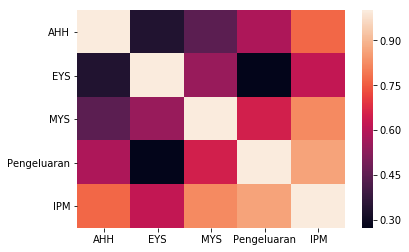

In [41]:
corr = final[['AHH', 'EYS', 'MYS', 'Pengeluaran','IPM']].corr()
ax = sns.heatmap(corr)

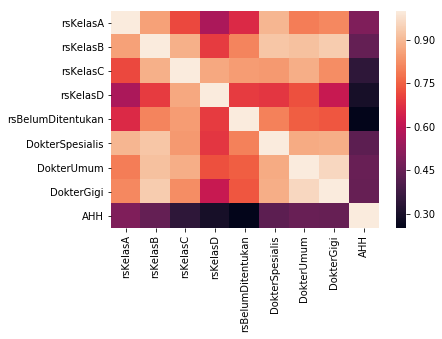

In [42]:
attributes = [
                'rsKelasA','rsKelasB','rsKelasC',
                'rsKelasD','rsBelumDitentukan',
                'DokterSpesialis','DokterUmum',
                'DokterGigi', 'AHH'
             ]
corr = final[attributes].corr()
ax = sns.heatmap(corr)

## Tambah Dataset Baru

In [43]:
puskes_1_df = pd.read_csv('../Data/puskesmas-2008-2012.csv')
puskes_1_df.head(5)

kode_provinsi                   nama_provinsi  tahun tipe_puskesmas  \
0             11  Prov. Nanggroe Aceh Darussalam   2008  Non-Perawatan   
1             11  Prov. Nanggroe Aceh Darussalam   2008      Perawatan   
2             11  Prov. Nanggroe Aceh Darussalam   2009  Non-Perawatan   
3             11  Prov. Nanggroe Aceh Darussalam   2009      Perawatan   
4             11  Prov. Nanggroe Aceh Darussalam   2010  Non-Perawatan   

   jumlah_puskesmas  
0               235  
1                66  
2               194  
3               115  
4               199

In [44]:
puskes_2_df = pd.read_csv('../Data/puskesmas-2013-2017.csv')
puskes_2_df.head(5)

No        Provinsi   2013   2014   2015   2016   2017
0   1            Aceh  334.0  337.0  339.0  340.0  341.0
1   2  Sumatera Utara  570.0  570.0  571.0  571.0  571.0
2   3  Sumatera Barat  262.0  264.0  264.0  264.0  269.0
3   4            Riau  207.0  211.0  212.0  213.0  215.0
4   5           Jambi  176.0  176.0  176.0  183.0  186.0

### Gabung antara keperawatan dan non keperawatan

In [45]:
jumlah = []
data_len = len(puskes_1_df.jumlah_puskesmas)
i = 0
adder = 0
while(i<data_len):
    adder += puskes_1_df.jumlah_puskesmas[i]
    if i%2 == 1:
        jumlah.append(adder)
        adder = 0
    i+=1

In [46]:
puskes_1_df = puskes_1_df.drop(['kode_provinsi','tipe_puskesmas', 'jumlah_puskesmas'],axis=1)
puskes_1_df.drop_duplicates(keep='first', inplace=True)
se = pd.Series(jumlah)
puskes_1_df['jumlah'] = se.values

In [47]:
puskes_1_df = puskes_1_df.loc[puskes_1_df.tahun >= 2010]
puskes_1_df.sort_values(['tahun','nama_provinsi'], ascending=[True,True], inplace=True)
puskes_1_df.head()

nama_provinsi  tahun  jumlah
164            Prov. Bali   2010     114
154          Prov. Banten   2010     217
64         Prov. Bengkulu   2010     170
134  Prov. D I Yogyakarta   2010     121
104     Prov. DKI Jakarta   2010     341

## Transformasi tahun di dataset baru

In [48]:
#membuat data frame baru dari dataset tenaga medis
#memisahkan antara atribut dan waktu
puskes_2_new_df = pd.DataFrame(columns=['Provinsi', 'tahun', 'jumlah'])
listWilayah = puskes_2_df['Provinsi'].tolist()
tahun = [2013, 2014, 2015, 2016, 2017]

for j in range(0,5):
    pusk = puskes_2_df[str(tahun[j])].tolist()
    for i in range(0, len(puskes_2_df)):
        puskes_2_new_df = puskes_2_new_df.append({'Provinsi':listWilayah[i], 'tahun':tahun[j], 'jumlah':pusk[i]}, ignore_index=True)

In [49]:
puskes_2_df = puskes_2_new_df.loc[puskes_2_new_df.tahun<=2014]
puskes_2_df.head()

Provinsi tahun  jumlah
0            Aceh  2013   334.0
1  Sumatera Utara  2013   570.0
2  Sumatera Barat  2013   262.0
3            Riau  2013   207.0
4           Jambi  2013   176.0

### Samakan Nama Provinsi

In [50]:
ps_1_list = puskes_1_df.head(33)['nama_provinsi'].tolist()
ps_1_list = a = [ x[6:].lower() for x in ps_1_list ]
ps_1_list

['bali',
 'banten',
 'bengkulu',
 'd i yogyakarta',
 'dki jakarta',
 'gorontalo',
 'jambi',
 'jawa barat',
 'jawa tengah',
 'jawa timur',
 'kalimantan barat',
 'kalimantan selatan',
 'kalimantan tengah',
 'kalimantan timur',
 'kepulauan bangka belitung',
 'kepulauan riau',
 'lampung',
 'maluku',
 'maluku utara',
 'nanggroe aceh darussalam',
 'nusa tenggara barat',
 'nusa tenggara timur',
 'papua',
 'papua barat',
 'riau',
 'sulawesi barat',
 'sulawesi selatan',
 'sulawesi tengah',
 'sulawesi tenggara',
 'sulawesi utara',
 'sumatera barat',
 'sumatera selatan',
 'sumatera utara']

In [51]:
ps_2_list = puskes_2_df.head(34)['Provinsi'].tolist()
ps_2_list = [ x.lower() for x in ps_2_list ]
ps_2_list

['aceh',
 'sumatera utara',
 'sumatera barat',
 'riau',
 'jambi',
 'sumatera selatan',
 'bengkulu',
 'lampung',
 'kepulauan bangka belitung',
 'kepulauan riau',
 'dki jakarta',
 'jawa barat',
 'jawa tengah',
 'di yogyakarta',
 'jawa timur',
 'banten',
 'bali',
 'nusa tenggara barat',
 'nusa tenggara timur',
 'kalimantan barat',
 'kalimantan tengah',
 'kalimantan selatan',
 'kalimantan timur',
 'kalimantan utara',
 'sulawesi utara',
 'sulawesi tengah',
 'sulawesi selatan',
 'sulawesi tenggara',
 'gorontalo',
 'sulawesi barat',
 'maluku',
 'maluku utara',
 'papua barat',
 'papua']

In [52]:
final.head(34)['Provinsi'].tolist()

['aceh',
 'sumatera utara',
 'sumatera barat',
 'riau',
 'jambi',
 'sumatera selatan',
 'bengkulu',
 'lampung',
 'kep. bangka belitung',
 'kepulauan riau',
 'dki jakarta',
 'jawa barat',
 'jawa tengah',
 'di yogyakarta',
 'jawa timur',
 'banten',
 'bali',
 'nusa tenggara barat',
 'nusa tenggara timur',
 'kalimantan barat',
 'kalimantan tengah',
 'kalimantan selatan',
 'kalimantan timur',
 'kalimantan utara',
 'sulawesi utara',
 'sulawesi tengah',
 'sulawesi selatan',
 'sulawesi tenggara',
 'gorontalo',
 'sulawesi barat',
 'maluku',
 'maluku utara',
 'papua barat',
 'papua']

In [53]:
def find_diff(a,b):
    not_same = []
    for i in a:
        same = False
        for j in b:
            if i == j:
                same = True
        if not same:
            not_same.append(i)
    return not_same

a = find_diff(ps_1_list, final.head(34)['Provinsi'].tolist())
a

['d i yogyakarta', 'kepulauan bangka belitung', 'nanggroe aceh darussalam']

In [54]:
b = find_diff(ps_2_list, final.head(34)['Provinsi'].tolist())
b

['kepulauan bangka belitung']

In [55]:
ps_1_list[ps_1_list.index("nanggroe aceh darussalam")] = 'aceh'
ps_1_list[ps_1_list.index("kepulauan bangka belitung")] = 'kep. bangka belitung'
ps_1_list[ps_1_list.index("d i yogyakarta")] = 'di yogyakarta'
ps_2_list[ps_2_list.index("kepulauan bangka belitung")] = 'kep. bangka belitung'

In [56]:
a = find_diff(ps_1_list, final.head(34)['Provinsi'].tolist())
a

[]

In [57]:
b = find_diff(ps_2_list, final.head(34)['Provinsi'].tolist())
b

[]

In [58]:
len(puskes_1_df)

99

In [59]:
len(puskes_2_df)

68

In [60]:
ps_1_list = ps_1_list * 3
ps_2_list = ps_2_list * 2

In [61]:
puskes_1_df.iloc[:,0] = pd.Series(ps_1_list).values
puskes_2_df.iloc[:,0] = pd.Series(ps_2_list).values

/home/amaceh/source_code/Datmin/Pre-Process/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
puskes_1_df.head(33)

nama_provinsi  tahun  jumlah
164                  bali   2010     114
154                banten   2010     217
64               bengkulu   2010     170
134         di yogyakarta   2010     121
104           dki jakarta   2010     341
274             gorontalo   2010      76
44                  jambi   2010     169
114            jawa barat   2010    1028
124           jawa tengah   2010     867
144            jawa timur   2010     946
194      kalimantan barat   2010     231
214    kalimantan selatan   2010     214
204     kalimantan tengah   2010     174
224      kalimantan timur   2010     217
84   kep. bangka belitung   2010      58
94         kepulauan riau   2010      66
74                lampung   2010     265
294                maluku   2010     156
304          maluku utara   2010     100
4                    aceh   2010     315
174   nusa tenggara barat   2010     150
184   nusa tenggara timur   2010     309
324                 papua   2010     297
314           papua barat   2010     106
34                   riau   2010     193
284        sulawesi barat   2010      81
254      sulawesi selatan   2010     416
244       sulawesi tengah   2010     160
264     sulawesi tenggara   2010     233
234        sulawesi utara   2010     170
24         sumatera barat   2010     246
54       sumatera selatan   2010     293
14         sumatera utara   2010     506

In [63]:
puskes_2_df.head(34)

Provinsi tahun  jumlah
0                   aceh  2013  334.00
1         sumatera utara  2013  570.00
2         sumatera barat  2013  262.00
3                   riau  2013  207.00
4                  jambi  2013  176.00
5       sumatera selatan  2013  319.00
6               bengkulu  2013  180.00
7                lampung  2013  280.00
8   kep. bangka belitung  2013   60.00
9         kepulauan riau  2013   70.00
10           dki jakarta  2013  340.00
11            jawa barat  2013    1.05
12           jawa tengah  2013  873.00
13         di yogyakarta  2013  121.00
14            jawa timur  2013  960.00
15                banten  2013  230.00
16                  bali  2013  120.00
17   nusa tenggara barat  2013  158.00
18   nusa tenggara timur  2013  362.00
19      kalimantan barat  2013  237.00
20     kalimantan tengah  2013  194.00
21    kalimantan selatan  2013  228.00
22      kalimantan timur  2013  222.00
23      kalimantan utara  2013    0.00
24        sulawesi utara  2013  183.00
25       sulawesi tengah  2013  183.00
26      sulawesi selatan  2013  440.00
27     sulawesi tenggara  2013  264.00
28             gorontalo  2013   91.00
29        sulawesi barat  2013   92.00
30                maluku  2013  190.00
31          maluku utara  2013  125.00
32           papua barat  2013  143.00
33                 papua  2013  391.00

In [64]:
puskes_1_df.rename(columns={'nama_provinsi':'Provinsi'}, inplace=True)
puskes_1_df.rename(columns={'tahun':'Tahun'}, inplace=True)
puskes_1_df.rename(columns={'jumlah':'Puskesmas'}, inplace=True)
puskes_1_df.head()

Provinsi  Tahun  Puskesmas
164           bali   2010        114
154         banten   2010        217
64        bengkulu   2010        170
134  di yogyakarta   2010        121
104    dki jakarta   2010        341

In [65]:
puskes_2_df.rename(columns={'tahun':'Tahun'}, inplace=True)
puskes_2_df.rename(columns={'jumlah':'Puskesmas'}, inplace=True)
puskes_2_df.head()

/home/amaceh/source_code/Datmin/Pre-Process/venv/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Provinsi Tahun  Puskesmas
0            aceh  2013      334.0
1  sumatera utara  2013      570.0
2  sumatera barat  2013      262.0
3            riau  2013      207.0
4           jambi  2013      176.0

In [66]:
puskes_df = pd.concat([puskes_1_df , puskes_2_df], axis=0)
puskes_df

Provinsi Tahun  Puskesmas
164                  bali  2010     114.00
154                banten  2010     217.00
64               bengkulu  2010     170.00
134         di yogyakarta  2010     121.00
104           dki jakarta  2010     341.00
274             gorontalo  2010      76.00
44                  jambi  2010     169.00
114            jawa barat  2010    1028.00
124           jawa tengah  2010     867.00
144            jawa timur  2010     946.00
194      kalimantan barat  2010     231.00
214    kalimantan selatan  2010     214.00
204     kalimantan tengah  2010     174.00
224      kalimantan timur  2010     217.00
84   kep. bangka belitung  2010      58.00
94         kepulauan riau  2010      66.00
74                lampung  2010     265.00
294                maluku  2010     156.00
304          maluku utara  2010     100.00
4                    aceh  2010     315.00
174   nusa tenggara barat  2010     150.00
184   nusa tenggara timur  2010     309.00
324                 papua  2010     297.00
314           papua barat  2010     106.00
34                   riau  2010     193.00
284        sulawesi barat  2010      81.00
254      sulawesi selatan  2010     416.00
244       sulawesi tengah  2010     160.00
264     sulawesi tenggara  2010     233.00
234        sulawesi utara  2010     170.00
..                    ...   ...        ...
38                  jambi  2014     176.00
39       sumatera selatan  2014     321.00
40               bengkulu  2014     180.00
41                lampung  2014     290.00
42   kep. bangka belitung  2014      61.00
43         kepulauan riau  2014      73.00
44            dki jakarta  2014     340.00
45             jawa barat  2014       1.05
46            jawa tengah  2014     875.00
47          di yogyakarta  2014     121.00
48             jawa timur  2014     960.00
49                 banten  2014     231.00
50                   bali  2014     120.00
51    nusa tenggara barat  2014     158.00
52    nusa tenggara timur  2014     370.00
53       kalimantan barat  2014     238.00
54      kalimantan tengah  2014     195.00
55     kalimantan selatan  2014     228.00
56       kalimantan timur  2014     174.00
57       kalimantan utara  2014      48.00
58         sulawesi utara  2014     187.00
59        sulawesi tengah  2014     184.00
60       sulawesi selatan  2014     446.00
61      sulawesi tenggara  2014     269.00
62              gorontalo  2014      93.00
63         sulawesi barat  2014      94.00
64                 maluku  2014     197.00
65           maluku utara  2014     127.00
66            papua barat  2014     149.00
67                  papua  2014     394.00

[167 rows x 3 columns]

In [67]:
final2 = pd.merge(left=final1, right=puskes_df, on=['Provinsi','Tahun'])
final2.head()

Provinsi rsKelasA rsKelasB rsKelasC rsKelasD rsBelumDitentukan Tahun  \
0            aceh        0        4       12        5                 0  2010   
1  sumatera utara        1        8       19        3                 0  2010   
2  sumatera barat        0        2       14        2                 0  2010   
3            riau        0        1       10        3                 0  2010   
4           jambi        0        1        9        2                 0  2010   

  DokterSpesialis DokterUmum DokterGigi  Puskesmas  
0             242        841        161      315.0  
1             400       1791        702      506.0  
2             290        738        286      246.0  
3             160        779        284      193.0  
4             161        433        102      169.0

In [68]:
final = pd.merge(left=final2, right=df_ipm_baru, on=['Provinsi','Tahun'])
final

Provinsi rsKelasA rsKelasB rsKelasC rsKelasD  \
0                    aceh        0        4       12        5   
1          sumatera utara        1        8       19        3   
2          sumatera barat        0        2       14        2   
3                    riau        0        1       10        3   
4                   jambi        0        1        9        2   
5        sumatera selatan        1        1        9        7   
6                bengkulu        0        1        3        7   
7                 lampung        0        2        7        2   
8    kep. bangka belitung        0        0        3        4   
9          kepulauan riau        0        0        7        1   
10            dki jakarta        2        6        1        0   
11             jawa barat        1       18       13        2   
12            jawa tengah        1       20       20        6   
13          di yogyakarta        1        3        1        0   
14             jawa timur        1       19       23        7   
15                 banten        0        4        2        0   
16                   bali        1        4        4        1   
17    nusa tenggara barat        0        1        6        1   
18    nusa tenggara timur        0        1        5       11   
19       kalimantan barat        0        2        7        4   
20      kalimantan tengah        0        2        5        7   
21     kalimantan selatan        0        2       10        2   
22       kalimantan timur        0        5        8        3   
23         sulawesi utara        0        1        4        7   
24        sulawesi tengah        0        2        7        3   
25       sulawesi selatan        1        5       18        2   
26      sulawesi tenggara        0        1        6        5   
27              gorontalo        0        1        1        4   
28         sulawesi barat        0        0        2        2   
29                 maluku        0        1        2        8   
..                    ...      ...      ...      ...      ...   
137                 jambi        0        3       12        6   
138      sumatera selatan        3        5       24       11   
139              bengkulu        0        2        4       10   
140               lampung        0        4       25        7   
141  kep. bangka belitung        0        1        6        6   
142        kepulauan riau        0        5       11        5   
143           dki jakarta       13       43       40       12   
144            jawa barat        7       47      111       52   
145           jawa tengah        8       31      110       95   
146         di yogyakarta        3       11       11       28   
147            jawa timur        6       42      107       69   
148                banten        2       16       27        7   
149                  bali        3        7       17       12   
150   nusa tenggara barat        0        3        8       11   
151   nusa tenggara timur        0        1       12       22   
152      kalimantan barat        1        3       14        9   
153     kalimantan tengah        0        2        7        6   
154    kalimantan selatan        2        2       17        4   
155      kalimantan timur        2        6       14       18   
156      kalimantan utara        0        1        3        3   
157        sulawesi utara        1        2       16       10   
158       sulawesi tengah        0        3        9        4   
159      sulawesi selatan        3       18       33        9   
160     sulawesi tenggara        0        2        7        8   
161             gorontalo        0        2        3        4   
162        sulawesi barat        0        0        2        1   
163                maluku        0        2        5       15   
164          maluku utara        0        1        3        9   
165           papua barat        0        0        4        7   
166                 papua        0        2        9

In [69]:
final.isnull().sum()

Provinsi             0
rsKelasA             0
rsKelasB             0
rsKelasC             0
rsKelasD             0
rsBelumDitentukan    0
Tahun                0
DokterSpesialis      0
DokterUmum           0
DokterGigi           0
Puskesmas            0
AHH                  0
EYS                  0
MYS                  0
Pengeluaran          0
IPM                  0
dtype: int64

In [70]:
# Simpan hasil olahan ke file CSV
final.to_csv('final.csv', index=False)

## Analisa Kembali

In [89]:
final["Provinsi"] = final["Provinsi"].astype("category")
final["Tahun"] = final["Tahun"].astype("category")

#ubah tipe datanya jadi float64
rsKelas = ['rsKelasA','rsKelasB','rsKelasC','rsKelasD','rsBelumDitentukan', 'DokterSpesialis','DokterUmum','DokterGigi']
for i in range(0, len(rsKelas)):
    final[rsKelas[i]] = final[rsKelas[i]].astype("float64")

In [90]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 16 columns):
Provinsi             167 non-null category
rsKelasA             167 non-null float64
rsKelasB             167 non-null float64
rsKelasC             167 non-null float64
rsKelasD             167 non-null float64
rsBelumDitentukan    167 non-null float64
Tahun                167 non-null category
DokterSpesialis      167 non-null float64
DokterUmum           167 non-null float64
DokterGigi           167 non-null float64
Puskesmas            167 non-null float64
AHH                  167 non-null float64
EYS                  167 non-null float64
MYS                  167 non-null float64
Pengeluaran          167 non-null float64
IPM                  167 non-null float64
dtypes: category(2), float64(14)
memory usage: 21.6 KB


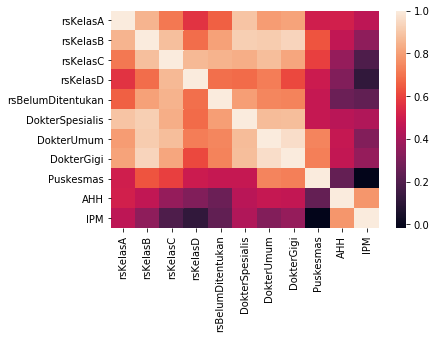

In [92]:
attributes = [
                'rsKelasA','rsKelasB','rsKelasC',
                'rsKelasD','rsBelumDitentukan',
                'DokterSpesialis','DokterUmum',
                'DokterGigi', 'Puskesmas','AHH', 'IPM'
             ]
corr = final[attributes].corr()
ax = sns.heatmap(corr)

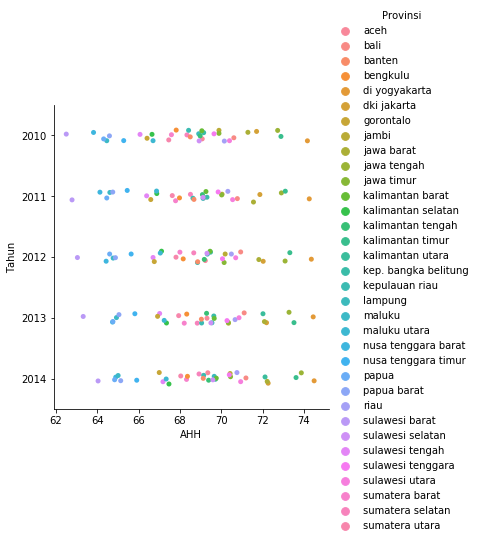

In [95]:
sns.catplot(x="AHH", y='Tahun',hue="Provinsi", data=final)

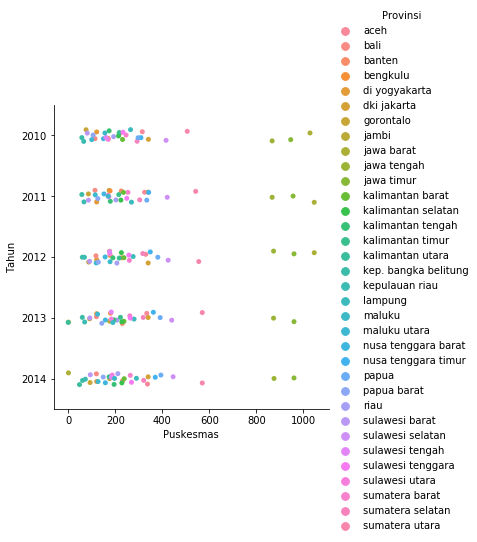

In [96]:
sns.catplot(x="Puskesmas", y='Tahun',hue="Provinsi", data=final)

Kesimpulan Sementara :
 - Jumlah Fasilitas Kesehatan hampir tidak mempengaruhi AHH